<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/umbcdata602/fall2020/blob/master/lab_naive_bayes.ipynb">
<img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# Lab -- Naive Bayes

References: 

* [Section 5.05 from VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html) -- github
* [1.9 Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) -- scikit-learn.org
* [Naive Bayes classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) -- wikipedia
* [Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) -- wikipedia

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set some plotting parameters
from matplotlib.colors import ListedColormap
plt.rcParams.update({'font.size': 16})
colors = ('red', 'blue')
cmap = ListedColormap(colors)

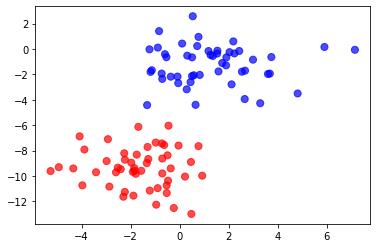

In [3]:
from sklearn.datasets import make_blobs

std_true = 1.5    # original: 1.5
n_samples = 100   # original: 100

# Generate some random Gaussian blobs as data
X, y = make_blobs(n_samples, 2, centers=2, random_state=2, cluster_std=std_true)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap, alpha=.7);

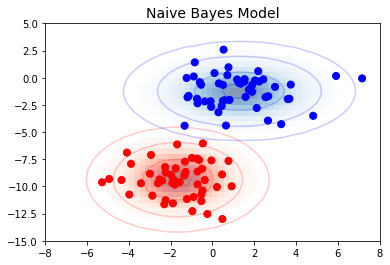

In [5]:
# Plot the data on the Gaussian probability densities
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(colors):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim);


# Gaussian Naive Bayes

In [6]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X, y);

In [7]:
# Verify parameter estimates
assert X.shape == (n_samples, 2)
assert X[y==0].shape == (n_samples/2, 2)

print("Mean:")
for k in [0,1]:
  print(X[y==k].mean(axis=0))

print("Variance:")
for k in [0,1]:
  print(X[y==k].var(axis=0))

print('true variance:', std_true*std_true)

Mean:
[-1.64939095 -9.36891451]
[ 1.29327924 -1.24101221]
Variance:
[2.06097003 2.4771687 ]
[3.33164805 2.22401382]
true variance: 2.25


In [8]:
model.theta_

array([[-1.64939095, -9.36891451],
       [ 1.29327924, -1.24101221]])

In [9]:
model.sigma_

array([[2.06097005, 2.47716872],
       [3.33164807, 2.22401384]])

In [10]:
# Convenience function for plotting the decision region
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

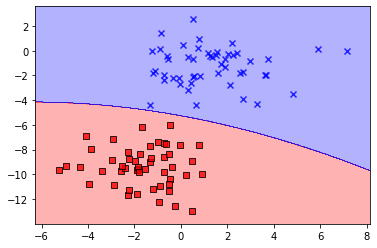

In [11]:
plot_decision_regions(X, y, model)

# Confusion matrix

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch06/images/06_08.png" width="300"/>

Define a convenience function for plotting the confusion matrix.

### References 

* [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) -- scikit-learn.org
* [heatmap](https://matplotlib.org/3.3.1/gallery/images_contours_and_fields/image_annotated_heatmap.html) -- matplotlib.org

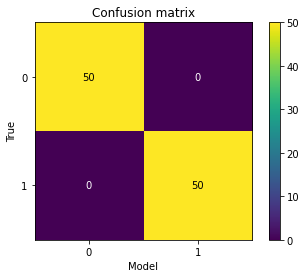

In [13]:
from sklearn.metrics import confusion_matrix

# Convenience function computes and plots the confusion matrix
def plot_confusion_matrix(X, y, classifier):
    y_pred = classifier.predict(X)
    mat = confusion_matrix(y_pred, y)

 
    fig, ax = plt.subplots()
    im = ax.imshow(mat)

    # Use classes as tick labels
    classes = np.unique(y)
    ax.set_xticks(np.arange(len(classes)))
    ax.set_yticks(np.arange(len(classes)))
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    ax.set_xlabel('Model')
    ax.set_ylabel('True')
    ax.set_title('Confusion matrix')

    # Add a colorbar
    ax.figure.colorbar(im, ax=ax)

    # Label the individual pixels in the heatmap
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    textcolors=("white", "black")
    threshold = im.norm(mat.max())/2
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            # Change the text's color depending on the data.
            kw.update(color=textcolors[int(im.norm(mat[i, j]) > threshold)])
            im.axes.text(j, i, mat[i, j], **kw)

plot_confusion_matrix(X, y, model)